## 파이썬 입문 part.2

In [2]:
import numpy as np
import pandas as pd
import requests
from PIL import Image 
%config Completer.use_jedi = False #자동완성 꺼줌

* `붕어빵 틀을 클래스, 어떻게 만들지 알려주는데 매서드, 안에 어떤 소스 추가 할지가 속성 추가, 그렇게 만들어진게 붕어빵이 객체(=인스턴스)임`
* 사실 인스턴스와 객체는 같은 것을 뜻합니다. 보통 객체만 지칭할 때는 그냥 객체라고 부르지만 클래스와 연관지어서 말할 때는 인스턴스라고 부릅니다. https://gksid102.tistory.com/21

* 넘파이는 [ , ] [ ][ ] 둘다 되고
* 리스트는 [ ][ ]
* 딕셔너리는 [ ][ ] 키값으로만
* 데이터 프레임에선 인덱싱을 iloc, loc을 이용함
* 랜덤분포 만들때는 shape기능이 아니고 size기능을 씀
* 쿼리에서 인덱스 고유값은 조건문 쓸때 "전체 조건문" 해주고 '고유값' 따로 붙여줘야 함
* axis=0 같은 칼럼 끼리, axix=1 같은 행 끼리


* 클래스로 함수정의 시 규칙
* 규칙1: class안에서 정의된 함수는 첫번째 입력으로 무조건 self
* 규칙2: class안에서 정의된 변수 (title, url, end)를 쓰려면 "self.변수이름"의 형태로 써야함

In [211]:
# 질문 10주차-1
#df.query("index <= '202212311' or index == '202212457'") # 고유값에는 ''를 따로해줘야 하는 건가 잘 모르겠음,,
#df.query('att >= @_mean')

### 10주차(1): 데이터 프레임 열 및 행추출, 활용

In [52]:
a='asdf'
a[[1,2]] # 정수인덱스를 리스트화 시켜서 인덱싱하는 것은 불가능 

TypeError: string indices must be integers

`-` 팬시인덱싱

In [53]:
#팬시 인덱싱
a=np.arange(55,61)
a[[1,2,-1]]

array([56, 57, 60])

In [54]:
a[np.array([1,2,-1])]

array([56, 57, 60])

In [55]:
a[[True,True,False,False,False,False]]

array([55, 56])

In [56]:
a[a<58]

array([55, 56, 57])

`-` 2차원 자료의 인덱싱

In [57]:
a = np.arange(4*3).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [58]:
a[0:2,1]

array([1, 4])

In [59]:
# 차원을 유지하면서 인덱싱하고 싶다면
a = np.arange(4*3).reshape(4,3)
a[0:2,[1]]

array([[1],
       [4]])

`-` Hash

In [60]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,200)
rep = np.random.choice(np.arange(5,21)*5,200)
mid = np.random.choice(np.arange(0,21)*5,200)
fin = np.random.choice(np.arange(0,21)*5,200)
key = ['202212'+str(s) for s in np.random.choice(np.arange(300,501),200,replace=False)]
test_dic = {key[i] : {'att':att[i], 'rep':rep[i], 'mid':mid[i], 'fin':fin[i]} for i in range(200)}
test_ndarray = np.array([key,att,rep,mid,fin],dtype=np.int64).T
del(att);del(rep);del(mid);del(fin);del(key)

* 학번 '202212460'에 해당하는 학생의 출석점수를 알고 싶다면?

In [61]:
#풀이 1 (numpy)
test_dic['202212460']['att'] 

55

In [62]:
#풀이 2 (hash)
test_ndarray[test_ndarray[:,0] == 202212460, 1]
#test_ndarray의 첫칼럼은 student id 이고 두번째 칼럼은 att라는 사실을 암기하고 있어야 한다.

array([55], dtype=int64)

* 풀이 2는 1에 비해 가독성이 없음(위치로 접근하기에)
* 요약: hash 스타일로 정보를 추출하는 것이 유용할 때가 있다. 그리고 보통 hash 스타일로 정보를 뽑는 것이 유리하다. (사실 numpy는 정보추출을 위해 개발된 자료형이 아니라 행렬 및 벡터의 수학연산을 지원하기 위해 개발된 자료형이다)
* 소망: 정보를 추출할때는 hash 스타일도 유용하다는 것은 이해함 
* 하지만 나는 가끔 넘파이스타일로 정보를 뽑고 싶은걸? 그리고 딕셔너리 형태가 아니고 엑셀처럼(행렬처럼) 데이터를 보고 싶은걸? 
* `판다스의 개발 동기: 엑셀처럼 데이터를 테이블 형태로 정리하고 싶다-> 걍 가독성있게 만들고 싶단거`

### 판다스로 바꾸는 방법

In [78]:
test_ndarray = np.array([key,att,rep,mid,fin],dtype=np.int64).T

In [79]:
# 방법1)
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['202212'+str(s) for s in np.random.choice(np.arange(300,501),20,replace=False)]
test_dic = {key[i] : {'att':att[i], 'rep':rep[i], 'mid':mid[i], 'fin':fin[i]} for i in range(20)}

pd.DataFrame(test_dic).T.head(3) #얼마나 가독성이 좋아 슬라이싱 하기도 쉽고!!

,att,rep,mid,fin
202212380,65,55,50,40
202212370,95,100,50,80
202212363,65,90,60,30


In [80]:
pd.DataFrame(test_dic).head(3) #전치시켜서 행과 열의 위치를 바꿔야 가독성 좋음

,202212380,202212370,202212363,202212488,202212312,202212377,202212463,202212471,202212400,202212469,202212318,202212432,202212443,202212367,202212458,202212396,202212482,202212452,202212387,202212354
att,65,95,65,55,80,75,65,60,95,90,55,95,95,50,50,95,50,65,70,90
rep,55,100,90,80,30,40,45,60,65,80,75,95,55,80,55,30,50,55,70,90
mid,50,50,60,75,30,100,45,25,20,80,35,45,15,40,15,30,45,15,40,80


In [81]:
# 방법2)
test_dic2 = {'att':{key[i]:att[i] for i in range(20)}, 
             'rep':{key[i]:rep[i] for i in range(20)},
             'mid':{key[i]:mid[i] for i in range(20)},
             'fin':{key[i]:fin[i] for i in range(20)}}

pd.DataFrame(test_dic2).head(3)

,att,rep,mid,fin
202212380,65,55,50,40
202212370,95,100,50,80
202212363,65,90,60,30


In [82]:
# 방법3)
pd.DataFrame({'att':att, 'rep':rep, 'mid':mid, 'fin':fin},index=key).head(3)

,att,rep,mid,fin
202212380,65,55,50,40
202212370,95,100,50,80
202212363,65,90,60,30


In [83]:
# 방법4)
df = pd.DataFrame({'att':att, 'rep':rep, 'mid':mid, 'fin':fin}) #키값 아직 연결안함
df = df.set_index([key]) #set_index 사용법 검색하면 나온다,,
df.head(3)

,att,rep,mid,fin
202212380,65,55,50,40
202212370,95,100,50,80
202212363,65,90,60,30


#### 데이터 프레임에서 해싱으로 원하는 정보 뽑기 (마치 딕셔너리처럼)

In [84]:
test_dic2['att']['202212380'] # 방법 2의 딕셔너리 형태

65

In [85]:
df['att']['202212380'] #데이터 프레임

65

#### 인덱싱으로 정보를 뽑는 기능 (마치 리스트나 넘파이처럼)

* 첫번째 학생의 기말고사 성적을 출력하기

In [86]:
test_ndarray[0,-1]

40

In [87]:
df.iloc[0,-1]

40

#### +) loc, iloc의 차이
- iloc은 i가 붙은 만큼 index를 활용한 location 지정 방법 → 사용 예시 :  DataFrame.iloc[index_index, column_index]
- loc은 index를 활용하지 않고 직접 index 및 column명을 통해 지정하는 방법 → 사용 예시 :  DataFrame.loc[index_name, column_name]

In [88]:
df.iloc[:2] #인덱스로 0,1 번째 인것만 출력

,att,rep,mid,fin
202212380,65,55,50,40
202212370,95,100,50,80


In [89]:
df.loc[:'202212370'] #인덱스 이름으로 지정해준거 포함해서 출력됨

,att,rep,mid,fin
202212380,65,55,50,40
202212370,95,100,50,80


#### 홀수번째 학생의 점수를 뽑기

In [92]:
len(test_ndarray[::2])

10

In [93]:
len(df.iloc[::2])

10

#### 맨 끝에서 3명의 점수를 출력하고 싶다.

In [98]:
test_ndarray[-3:]

array([[202212452,        65,        55,        15,        45],
       [202212387,        70,        70,        40,        35],
       [202212354,        90,        90,        80,        90]],
      dtype=int64)

In [99]:
df.iloc[-3:]

,att,rep,mid,fin
202212452,65,55,15,45
202212387,70,70,40,35
202212354,90,90,80,90


In [100]:
df[-3:]

,att,rep,mid,fin
202212452,65,55,15,45
202212387,70,70,40,35
202212354,90,90,80,90


#### 맨 끝에서 3명의 점수중 마지막 2개의 칼럼만 출력하고 싶다.

In [101]:
test_ndarray[-3:,-2:]

array([[15, 45],
       [40, 35],
       [80, 90]], dtype=int64)

In [102]:
df.iloc[-3:,-2:]

,mid,fin
202212452,15,45
202212387,40,35
202212354,80,90


`### 궁극: 해싱과 인덱싱을 모두 지원하는 아주 우수한 자료형을 만들고 싶음`

#### 예제1: 중간고사 점수가 20점 이상이면서 동시에 출석점수가 60점미만인 학생들의 기말고사 점수를 출력

In [105]:
# 방법1) 데이터 베이스 스타일
df.query("mid >= 20 and att <60")['fin']

202212488    80
202212318    25
202212367    30
202212482    10
Name: fin, dtype: int32

In [124]:
# 방법2) 넘파이일때 
test_ndarray[(test_ndarray[:,1]< 60) & (test_ndarray[:,3]>=20)][:,4]

array([80, 25, 30, 10], dtype=int64)

In [125]:
test_ndarray[(test_ndarray[:,1] < 60) & (test_ndarray[:,3] >= 20),-1] #근데 가독성 떨어짐

array([80, 25, 30, 10], dtype=int64)

### 1단계: 판다스 사용 방법
1) 데이터 프레임 선언
  * 딕셔너리에서 만들거나
  * 2차원 넘파이 배열을 만듦
  
2) 열의 이름 부여
  * 딕셔너리를 통하여 만들면 딕셔너리의 key가 자동으로 열의 이름이 됨
  * pd.DataFrame()의 옵션에 columns를 이용
  * df.columns에 원하는 열이름을 덮어씀
  
2) 행의 이름 부여
  * 중첩 dict이면 nested dic의 key가 알아서 행의 이름으로 된다.
  * pd.DataFrame()의 index 옵션 이용
  * df.index에 덮어씌움
  * df.set_index() 를 이용하여 덮어씌운다

In [126]:
# 1. 데이터 프레임 생성-딕셔너리 방법으로
pd.DataFrame({'att':[30,40,50],'mid':[50,60,70]})

,att,mid
0,30,50
1,40,60
2,50,70


In [127]:
pd.DataFrame({'att':(30,40,50),'mid':(50,60,70)})

,att,mid
0,30,50
1,40,60
2,50,70


In [128]:
pd.DataFrame({'att':np.array([30,40,50]),'mid':np.array([50,60,70])})

,att,mid
0,30,50
1,40,60
2,50,70


In [130]:
# 1. 데이터 프레임 만들기- 넘파이 배열로
pd.DataFrame(np.arange(2*3).reshape(2,3))

,0,1,2
0,0,1,2
1,3,4,5


In [131]:
# 2. 열의 이름 부여-딕셔너리를 통하여 만들면 딕셔너리의 key가 자동으로 열의 이름이 됨
pd.DataFrame({'att':np.array([30,40,50]),'mid':np.array([50,60,70])})

,att,mid
0,30,50
1,40,60
2,50,70


In [132]:
#2. 열의 이름 부여-pd.DataFrame()의 옵션에 columns를 이용
pd.DataFrame(np.arange(2*3).reshape(2,3),columns=['X1','X2','X3'])

,X1,X2,X3
0,0,1,2
1,3,4,5


In [133]:
#2. 열의 이름 부여- df.columns에 원하는 열이름을 덮어씀
df=pd.DataFrame(np.arange(2*3).reshape(2,3))
df.columns = ['X1','X2','X3']
df

,X1,X2,X3
0,0,1,2
1,3,4,5


In [134]:
#3. 행의 이름 부여- 중첩 dict이면 nested dic의 key가 알아서 행의 이름으로 됨
pd.DataFrame({'att':{'guebin':30, 'iu':40, 'hynn':50} , 'mid':{'guebin':5, 'iu':45, 'hynn':90}})

,att,mid
guebin,30,5
iu,40,45
hynn,50,90


In [135]:
#3. 행의 이름 부여- pd.DataFrame()의 index 옵션 이용
pd.DataFrame({'att':[30,40,50] , 'mid':[5,45,90]}, index=['guebin','iu','hynn'])

,att,mid
guebin,30,5
iu,40,45
hynn,50,90


In [137]:
#3. 행의 이름 부여- df.index에 덮어씌움
df=pd.DataFrame({'att':[30,40,50] , 'mid':[5,45,90]})
df.index = pd.Index(['guebin','iu','hynn'])
df

,att,mid
guebin,30,5
iu,40,45
hynn,50,90


In [142]:
# 자료형, len, shape, for문의 반복변수

In [138]:
len(df) # row의 갯수 

3

In [139]:
df.shape 

(3, 2)

In [141]:
# for문의 반복변수
for k in df:
    print(k)

att
mid


*  2차원 ndarray가 pd.DataFrame에 대응한다면 1차원 ndarray는 pd.Series에 대응한다.

In [143]:
a=pd.Series(np.random.randn(3))
a

0    0.106173
1    0.723759
2    0.217990
dtype: float64

In [144]:
a.shape

(3,)

### 판다스 공부 2단계
* 데이터
* 열선택
* 행선택

In [102]:
#데이터
np.random.seed(43025)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['202212' + str(s) for s in np.random.choice (np.arange(300,501), 20, replace=False) ]

df=pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin},index=key)
df.head(3)

,att,rep,mid,fin
202212436,55,85,75,80
202212487,75,50,25,5
202212413,60,40,80,75


#### 하나의 열을 선택

In [103]:
#방법 1
df.att.head(3) #이거 타입은 시리즈임. 데이터 프레임에서 1차원이 시리즈니까

202212436    55
202212487    75
202212413    60
Name: att, dtype: int32

In [104]:
#방법 2: dict스타일
df['att'].head(3) #시리즈

202212436    55
202212487    75
202212413    60
Name: att, dtype: int32

In [105]:
# 방법 3:  dict스타일
df[['att']].head(3) #데이터 프레임

,att
202212436,55
202212487,75
202212413,60


In [106]:
# 방법 4: ndarray스타일
df.iloc[:,0].head(3) #시리즈

202212436    55
202212487    75
202212413    60
Name: att, dtype: int32

In [107]:
# 방법 5: ndarray스타일
df.iloc[:,[0]].head(3) #데이터프레임

,att
202212436,55
202212487,75
202212413,60


In [108]:
# 방법 6: ndarray 스타일과 dict 스타일의 혼합
df.loc[:,'att'].head(3)

202212436    55
202212487    75
202212413    60
Name: att, dtype: int32

In [109]:
# 방법 7: ndarray 스타일과 dict 스타일의 혼합
df.loc[:,['att']].head(3)

,att
202212436,55
202212487,75
202212413,60


In [110]:
# 방법 8: nparray 스타일 + bool 인덱싱
df.iloc[:,[True,False,False,False]].head(3)

,att
202212436,55
202212487,75
202212413,60


In [111]:
# 방법 9: ndarray와 dict의 홉합형 + bool 인덱싱
df.loc[:,[True,False,False,False]].head(3)

,att
202212436,55
202212487,75
202212413,60


* 여러개의 열을 선택

In [112]:
# 방법1: dict 스타일
df[['att','fin']].head(3)

,att,fin
202212436,55,80
202212487,75,5
202212413,60,75


In [113]:
# 방법 2: ndarray 스타일 (정수리스트로 인덱싱, 슬라이싱, 스트라이딩)
df.iloc[:,[0,1]].head(3) # 정수의 리스트를 전달하여 컬럼추출

,att,rep
202212436,55,85
202212487,75,50
202212413,60,40


In [114]:
df.iloc[:,range(2)].head(3)

,att,rep
202212436,55,85
202212487,75,50
202212413,60,40


In [115]:
df.iloc[:,:2].head(3)  # 슬라이싱 , 0,1,2에서 마지막 2는 제외되고 0,1에 해당하는 것만 추출

,att,rep
202212436,55,85
202212487,75,50
202212413,60,40


In [116]:
df.iloc[:,::2].head(3)  # 스트라이딩, 좀 투머치긴 하다,,

,att,mid
202212436,55,75
202212487,75,25
202212413,60,80


In [117]:
# 방법3: ndarray 와 dict의 혼합형
df.loc[:,['att','mid']].head(3) 

,att,mid
202212436,55,75
202212487,75,25
202212413,60,80


In [118]:
df.loc[:,'att':'mid'].head(3) # 마지막의 mid도 포함된다. 

,att,rep,mid
202212436,55,85,75
202212487,75,50,25
202212413,60,40,80


In [119]:
# 방법4: bool을 이용한 인덱싱

#### 첫번째 행을 선택

In [120]:
# 방법 1
df.iloc[0]

att    55
rep    85
mid    75
fin    80
Name: 202212436, dtype: int32

In [121]:
# 방법 2
df.iloc[[0]]

,att,rep,mid,fin
202212436,55,85,75,80


In [122]:
# 방법 3
df.iloc[0,:]

att    55
rep    85
mid    75
fin    80
Name: 202212436, dtype: int32

In [123]:
# 방법 4
df.iloc[[0],:]

,att,rep,mid,fin
202212436,55,85,75,80


In [124]:
# 방법 5
df.loc['202212436']

att    55
rep    85
mid    75
fin    80
Name: 202212436, dtype: int32

In [125]:
# 방법6
df.loc[['202212436']]

,att,rep,mid,fin
202212436,55,85,75,80


#### 여러개의 행 선택

In [126]:
# 방법1
df.iloc[[0,2]] 

,att,rep,mid,fin
202212436,55,85,75,80
202212413,60,40,80,75


In [127]:
df.iloc[[0,2],:] 

,att,rep,mid,fin
202212436,55,85,75,80
202212413,60,40,80,75


In [128]:
# 방법2
df.loc[['202212436','202212413']] 

,att,rep,mid,fin
202212436,55,85,75,80
202212413,60,40,80,75


In [129]:
df.loc[['202212436','202212413'],:] 

,att,rep,mid,fin
202212436,55,85,75,80
202212413,60,40,80,75


In [130]:
# 그외 방법
df.iloc[::7] # 스트라이딩

,att,rep,mid,fin
202212436,55,85,75,80
202212434,100,40,75,95
202212485,50,65,0,60


In [131]:
df.iloc[:3]

,att,rep,mid,fin
202212436,55,85,75,80
202212487,75,50,25,5
202212413,60,40,80,75


In [132]:
df.loc[:'202212413']

,att,rep,mid,fin
202212436,55,85,75,80
202212487,75,50,25,5
202212413,60,40,80,75


#### 조건문 추가

In [133]:
df[df.att<80].loc[:,'rep':].head(3)

,rep,mid,fin
202212436,85,75,80
202212487,50,25,5
202212413,40,80,75


In [134]:
df.loc[df.att<80,'rep':].head(3)

,rep,mid,fin
202212436,85,75,80
202212487,50,25,5
202212413,40,80,75


In [135]:
df.iloc[list(df.att<80),1:].head(3) #위에와 다르게 list()를 해줘야 하는데 아마도 df[행,렬]의 구조이기에 그런가,,?

,rep,mid,fin
202212436,85,75,80
202212487,50,25,5
202212413,40,80,75


### query

In [136]:
type(df.query)

method

In [137]:
df.query('att==90 and mid>30')

,att,rep,mid,fin
202212438,90,60,95,80


In [138]:
df.query('att<rep and mid<fin')

,att,rep,mid,fin
202212436,55,85,75,80
202212311,60,75,45,75
202212485,50,65,0,60
202212457,60,70,70,95
202212412,70,95,65,80


In [139]:
df.query('att<rep<80')

,att,rep,mid,fin
202212455,50,65,45,40
202212311,60,75,45,75
202212485,50,65,0,60
202212457,60,70,70,95


In [140]:
df.query("index <= '202212311' or index == '202212457'") # 추측상,고유값 인덱스에는 ''를 따로 해줘야 하나봄

,att,rep,mid,fin
202212311,60,75,45,75
202212457,60,70,70,95


* 쿼리 기능은 시계열 자료에서 가장 유용함

In [141]:
pd.date_range('20211226',periods=10)

DatetimeIndex(['2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31', '2022-01-01', '2022-01-02',
               '2022-01-03', '2022-01-04'],
              dtype='datetime64[ns]', freq='D')

In [142]:
_df=pd.DataFrame(np.random.normal(size=(10,4)),columns=list('ABCD'),index=pd.date_range('20211226',periods=10))
_df

,A,B,C,D
2021-12-26,0.468333,1.366108,0.452998,0.048724
2021-12-27,-0.715074,-0.455669,0.128173,-0.893635
2021-12-28,1.233522,-0.258475,0.875717,-0.528988
2021-12-29,0.175954,-1.710716,0.878738,-1.016842
2021-12-30,0.361689,-0.271389,1.456367,-0.414429
2021-12-31,-0.653896,0.613566,-0.083197,1.875084
2022-01-01,1.120872,-1.387346,0.338263,1.141775
2022-01-02,1.726662,-0.103970,-0.172963,-0.547137
2022-01-03,1.038209,-1.625270,-0.046639,2.320188
2022-01-04,1.996487,1.173124,-1.409371,3.013173


In [143]:
_df.query(" '2021-12-29' <=  index <= '2022-01-01' ")
#

,A,B,C,D
2021-12-29,0.175954,-1.710716,0.878738,-1.016842
2021-12-30,0.361689,-0.271389,1.456367,-0.414429
2021-12-31,-0.653896,0.613566,-0.083197,1.875084
2022-01-01,1.120872,-1.387346,0.338263,1.141775


In [144]:
_df.query(" '2021-12-29' <=  index <= '2022-01-01' and A+B<C  ")

,A,B,C,D
2021-12-29,0.175954,-1.710716,0.878738,-1.016842
2021-12-30,0.361689,-0.271389,1.456367,-0.414429
2022-01-01,1.120872,-1.387346,0.338263,1.141775


* 위의 index는 행을 나타내고, 아래 Index는 열을 나타낸다고 착각할수 있는데 그게 아니고 `index는 행과 열을 지시하는 수단이다.`

* 쿼리가 만능은 아니다

In [149]:
df.columns = pd.Index(['att score', 'rep score', 'mid score', 'fin score'])

In [150]:
df.head(3)

,att score,rep score,mid score,fin score
202212436,55,85,75,80
202212487,75,50,25,5
202212413,60,40,80,75


In [154]:
df.query('att score < 90') #칼럼 이름에 공백이 인식이 안되서 그런가

SyntaxError: invalid syntax (<unknown>, line 1)

### 판다스 공부 3단계

#### 전치

In [155]:
ndarray = np.arange(2*3).reshape(2,3)
df = pd.DataFrame(ndarray)
df

,0,1,2
0,0,1,2
1,3,4,5


In [156]:
ndarray.T

array([[0, 3],
       [1, 4],
       [2, 5]])

In [157]:
df.T

,0,1
0,0,3
1,1,4
2,2,5


In [158]:
ndarray.sum(axis=0) #

array([3, 5, 7])

In [159]:
df.sum(axis=0)

0    3
1    5
2    7
dtype: int64

#### cumsum: 누적합

In [164]:
df

,0,1,2
0,0,1,2
1,3,4,5


In [165]:
ndarray.cumsum(axis=0)

array([[0, 1, 2],
       [3, 5, 7]], dtype=int32)

In [166]:
df.cumsum(axis=0)

,0,1,2
0,0,1,2
1,3,5,7


#### 형태변환

In [167]:
ndarray.tolist()

[[0, 1, 2], [3, 4, 5]]

In [168]:
df.to_dict()

{0: {0: 0, 1: 3}, 1: {0: 1, 1: 4}, 2: {0: 2, 1: 5}}

In [169]:
df.to_numpy()

array([[0, 1, 2],
       [3, 4, 5]])

### 10주차(2): 클래스 기초(밈과 비슷)

#### 밈
* 딱히 정형화 하기 어렵지만 위의예제들은 복제가 되는 어떠한 틀이 있다. 이것을 밈(=유전자)라고 부른다!!
* 많은 사람들에게 그 복제내용이 확산되어 재생산된다. 이것을 밈화라고 한다.
* 그대로 복제하지 않고 변형을 거치며 전혀 다른 성질을 가질 수 있다.
* 밈이 또 다른 밈을 만들수 있다.
* -> 경우마다 쓰는 어떤 틀이 있고 변형될수 있으며 활용하여 또다른 틀 만들수 있다

#### 클래스
* 클래스는 과자틀과 비슷하다. 클래스란 똑같은 무엇인가를 계속 만들어 낼 수도 있는 설계도면이고 객체란 클래스로 만든 피조물을 뜻한다. (점프투파이썬)

`클래스는 복제, 변형, 재생산을 용이하게 하기 위해 만들어진 확장가능한 프로그램의 코드의 단위(extensible program-code-template)이다. 즉 밈이다`

* 1단계: 개념의 인지 (이거 재미있겠다 밈으로 만들자 // 이 코드 쓸모있다, 이 코드를 쉽게 찍어내는 클래스로 만들어두자)
* 2단계: 복사하고 싶은 속성을 추려 복사가능한 틀을 만듬 (밈 초기 컨텐츠 // 클래스의 선언)
* 3단계: 밈에서 다양한 컨텐츠를 재생산, 때로는 변형하여 재생산, 때로는 그것을 응용한 다른밈을 만듦 (밈화 // 클래스의 인* 스턴스화, 상속, 메소드오버라이딩)

#### 인스턴스
* 클래스에서 생성된 콘텐츠를 인스턴스라고 함 ex) school=STOOP() : STOOOP 클래스에서school 인스턴스 만듬, 클래스 내의 함수(메소드)가 아니고 클래스를 다른 양식으로 복사 한다고 보면됨.
* 생성된 콘텐츠(=인스턴스)에서 .을 찍고 클래스 내의 접근할 수 있는 여러 자료들에 접근가능하며 내용도 독립적으로 바꿀 수 있다.

#### 밈을 만들어보자

In [178]:
from IPython.core.display import HTML 

In [186]:
# 문자열 포멧팅(문자열 끼워넣기)
'제 이름은 {}이고 사는곳은 {}입니다.'.format('커피','전주')

'제 이름은 커피이고 사는곳은 전주입니다.'

In [187]:
'제 이름은 {name}이고 사는곳은 {add}입니다.'.format(name='커피',add='전주')

'제 이름은 커피이고 사는곳은 전주입니다.'

In [179]:
# HTML을 이용한 밈 생성
HTML("<p> 이름 </p>")

In [210]:
url1='https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop1.jpeg?raw=true'
url2='https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop2.png?raw=true'

In [184]:
htmlstr = "<p> {title} </p> <img src= '{url}'> <p> {end} </p> " 
HTML(htmlstr.format(title='학교폭력',url=url1,end='멈춰~~~~'))

#### 함수를 만들어서 코드로 관리

In [188]:
def stop():
    htmlstr = "<p> {title} </p> <img src= '{url}'> <p> {end} </p> " 
    display(HTML(htmlstr.format(title=ttl,url=url,end=end)))

In [192]:
ttl = '학교폭력'
url = url1
end = '멈춰~~~~'
stop()

#### 클래스를 이용해 동시관리

In [193]:
class STOOOP: # STOOOP 은 양식문서의 이름이라 생각할 수 있다. 
    title = "학교폭력" 
    url = url1 
    end = "멈춰~~~~" 
    def stop(self): ## 규칙1: class안에서 정의된 함수는 첫번째 입력으로 무조건 self 
        htmlstr = "<p> {title} </p> <img src= '{url}'> <p> {end} </p> " 
        display(HTML(htmlstr.format(title=self.title,url=self.url,end=self.end)))
        ## 규칙2: class안에서 정의된 변수 (title, url, end)를 쓰려면 "self.변수이름"의 형태로 써야함

In [217]:
school = STOOOP() 
# STOOOP이라는 클래스에서 school이라는 인스턴를 만드는 과정 
# STOOOP이라는 이름의 양식문서를 복사해 하나의 hwp를 파일을 만들어 밈을 생성하고 그 파일이름을 school이라고 하자.
# 그러니까 STOOP.hwp 와 school.hwp가 있는 상황
# STOOOP 클래스 -> school 인스턴스 만듬

In [196]:
school.title

'학교폭력'

In [197]:
school.stop()

#### 이걸 활용해 다른 밈을 만들고 싶다면

In [198]:
kospi = STOOOP() # 코스피하락 멈춰를 위해 STOOP.hwp양식문서에서 하나의 밈을 찍어낸다(=kospi.hwp 생성).

In [199]:
kospi.title, kospi.url, kospi.end

('학교폭력',
 'https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop1.jpeg?raw=true',
 '멈춰~~~~')

In [201]:
kospi.title = '코스피하락'

In [202]:
kospi.stop()

### 11주차: 클래스 공부 1단계

In [212]:
import requests
from PIL import Image 

In [215]:
url= 'https://stat.jbnu.ac.kr/sites/stat/images/intro_about_02.jpg'
url1 = 'https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop1.jpeg?raw=true'
url2 = 'https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop2.png?raw=true' 

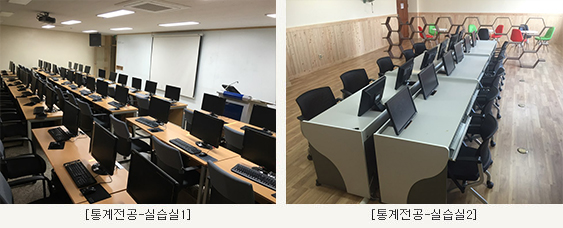

In [214]:
Image.open(Image.io.BytesIO(requests.get(url).content))

#### 클래스 선언 및 사용예시

In [218]:
class STOOOP: 
    title = '학교폭력!' 
    url = url1
    end = '멈춰~~~~'
    def stop(self):
        print(self.title)
        display(Image.open(Image.io.BytesIO(requests.get(self.url).content)))
        print(self.end) 

* 규칙1: 메소드(=class안에서 정의된 함수)의 첫번째 인자는 무조건 self
* 규칙2: 메소드에서 class안에 정의된 변수들(title, url, end)을 사용하려면 "self.변수이름"와 같은 형식으로 쓴다.
* 즉 "self.title", "self.url", "self.end" 와 같은 방식으로 써야한다.
* 참고: 규칙2에서 가끔 self의 자리에 "STOOOP.title","STOOOP.url","STOOOP.end" 와 같이 클래스의 이름으로 쓰기도 한다.

#### 연습문제

In [ ]:
#문제 1
#클래스내에는 변수 a가 있다. 변수 a의 초기값은 True이다.
#클래스에는 show()라는 메소드가 있다. show()의 기능은 a의 값을 print하는 기능을 한다.

In [219]:
class Klass1: 
    a = True 
    def show(self): #메소드
        print(self.a)

In [220]:
ex1 = Klass1()

In [221]:
ex1.a

True

In [222]:
ex1.show()

True


In [ ]:
#문제2
#클래스내에는 변수 a가 있다. 변수 a의 초기값은 1이다.
#클래스에는 up()라는 메소드가 있다. up()의 기능은 a의 값을 1증가시키는 기능을 한다.

In [253]:
class Klass2:
    a = 1
    def up(self): #메소드 up()의 첫번째 인자를 self라고 정의해줘야 하는데 나는 자꾸 잊네,,
        self.a = self.a + 1 

In [254]:
ex2 = Klass2()
ex2.a

1

In [255]:
ex2.up()

In [256]:
ex2.a

2

In [ ]:
# 문제3
#클래스내에는 변수 a가 있다. 변수 a의 초기값은 0이다.
#클래스에는 up(),down(),show()라는 메소드가 있다. 각각은 a의 값을 1증가, a의 값을 1감소, a의 값을 print하는 기능을 한다.

In [266]:
class Klass3:
    a = 0
    def up(self):
        self.a += self.a
    def down(self):
        self.a -= self.a
    def show(self):
        print(self.a)

In [267]:
ex3 = Klass3()

In [268]:
ex3.a

0

In [269]:
ex3.up() #1 더하고
ex3.down() #1 빼주고
ex3.show() #보여주니까 0 그대로 나옴

0


In [271]:
#문제 4
#클래스내에는 변수 url이 있음. 
#url의 초기값은 https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop1.jpeg?raw=true이다.
#클래스에는 show()이라는 메소드를 가지는데, 메소드는 아래와 같은 기능을 한다.
#기능1: url의 그림을 출력, 
#기능2: '당신은 이 그림을 n번 보았습니다' 출력. 여기에서 n은 그림을 본 횟수

In [279]:
class Klass4():
    url = 'https://github.com/guebin/IP2022/blob/master/_notebooks/2022-05-07-stop1.jpeg?raw=true'
    a = 0
    def show(self):
        display(Image.open(Image.io.BytesIO(requests.get(self.url).content)))
        self.a += 1
        print('당신은 이 그림을 {}번 보았습니다'.format(self.a)) 

In [280]:
ex4 = Klass4()

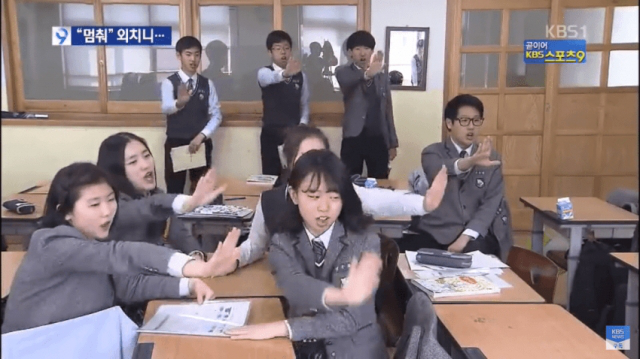

당신은 이 그림을 1번 보았습니다


In [281]:
ex4.show()

In [282]:
#문제 5
#클래스를 선언하라. ["가위","바위","보"]중 하나를 골라서 내는 메소드를 정의하라.
# 힌트
import numpy as np
np.random.choice(["가위","바위","보"])

'가위'

In [298]:
class RCP():
    def rcp(self):
        self.b = np.random.choice(["가위","바위","보"])
        print(self.b)

In [299]:
ex5 = RCP()

In [300]:
ex5.rcp()

가위


### 11주차: 클래스 공부 2단계

In [301]:
from PIL import Image
import requests

#### `__init__()`
* `__init__()`함수를 이용하여 "클래스->인스턴스(클래스의 사본)"의 시점에서 수행하는 일련의 동작들을 묶어서 수행할 수 있음

In [302]:
class STOOOP: 
    #title = '학교폭력!' 
    url = url1
    end = '멈춰~~~~'
    def __init__(self,title): 
        self.title = title
    def stop(self):
        print(self.title)
        display(Image.open(Image.io.BytesIO(requests.get(self.url).content)))
        print(self.end) 